# Load houses data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales.shape

(21613, 21)

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

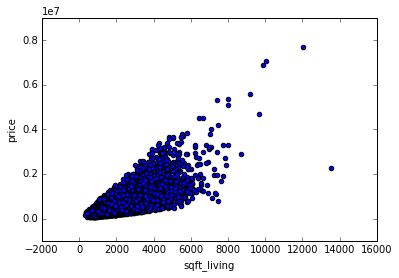

In [5]:
sales.plot(kind='scatter',x="sqft_living",y="price",subplots=True)
plt.show()

# Create a simple regression model of sqft_living to price

## Build the regression model using only sqft_living as a feature

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import numpy as np

In [7]:
X=sales['sqft_living'].values.reshape(-1, 1)
y=sales['price']
X_train,X_test, y_train, y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
LinearR_model=LinearRegression()
LinearR_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the simple model

In [9]:
print (y_train.mean())
print(y_test.mean())

542799.838346
529242.610687


In [10]:
print(LinearR_model.score(X_test,y_test))

0.479157707997


In [11]:
%matplotlib inline

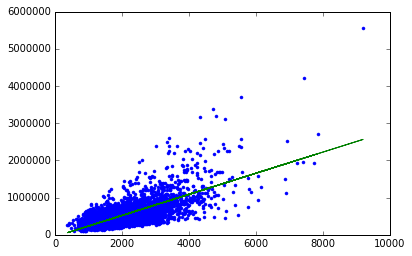

In [12]:
plt.plot(X_test,y_test,'.',
        X_test,LinearR_model.predict(X_test),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [13]:
LinearR_model.coef_
LinearR_model.intercept_

-48257.063455561176

# Explore other features in the data

To build a more elaborate model, we will explore using more features.!!!!!!!!!

In [14]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [15]:
sales[my_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
sqft_living    21613 non-null int64
sqft_lot       21613 non-null int64
floors         21613 non-null float64
zipcode        21613 non-null int64
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


id                  Axes(0.125,0.731522;0.110714x0.168478)
price            Axes(0.257857,0.731522;0.110714x0.168478)
bedrooms         Axes(0.390714,0.731522;0.110714x0.168478)
bathrooms        Axes(0.523571,0.731522;0.110714x0.168478)
sqft_living      Axes(0.656429,0.731522;0.110714x0.168478)
sqft_lot         Axes(0.789286,0.731522;0.110714x0.168478)
floors              Axes(0.125,0.529348;0.110714x0.168478)
waterfront       Axes(0.257857,0.529348;0.110714x0.168478)
view             Axes(0.390714,0.529348;0.110714x0.168478)
condition        Axes(0.523571,0.529348;0.110714x0.168478)
grade            Axes(0.656429,0.529348;0.110714x0.168478)
sqft_above       Axes(0.789286,0.529348;0.110714x0.168478)
sqft_basement       Axes(0.125,0.327174;0.110714x0.168478)
yr_built         Axes(0.257857,0.327174;0.110714x0.168478)
yr_renovated     Axes(0.390714,0.327174;0.110714x0.168478)
zipcode          Axes(0.523571,0.327174;0.110714x0.168478)
lat              Axes(0.656429,0.327174;0.110714x0.16847

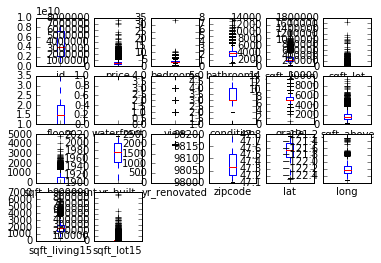

In [16]:
sales.plot(kind='box',subplots=True,layout=(4,6),sharex=False, sharey=False)

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [17]:
X2=sales[my_features].iloc[:,:]
y2=sales['price']

In [18]:
X_train2,X_test2, y_train2, y_test2=model_selection.train_test_split(X2,y2,test_size=0.2,random_state=0)
LinearR_model2=LinearRegression()
LinearR_model2.fit(X_train2,y_train2)
print(LinearR_model2.score(X_test2,y_test2))

0.499359281312


# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [19]:
house1=sales.loc[lambda sales: sales.id==5309101200,:]

In [20]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


## Comparing the results of the simple model with adding more features

In [21]:
print (house1['price'])

1054    620000
Name: price, dtype: int64


In [22]:
print (LinearR_model.predict(house1.sqft_living.values.reshape(1,-1)))

[ 633267.47422744]


In [23]:
print (LinearR_model2.predict(house1[my_features]))

[ 637556.26515926]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [24]:
# house1=sales.loc[lambda sales: sales.id==5309101200,:]
house2 = sales[sales['id']==1925069082]

In [25]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
print (LinearR_model.predict(house2.sqft_living.values.reshape(1,-1)))

[ 1269357.04273158]


In [27]:
print (LinearR_model2.predict(house2[my_features]))

[ 1274443.76531342]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [29]:
# print (my_features_model.predict(graphlab.SFrame(bill_gates)))

In [30]:
print (LinearR_model2.predict(pd.DataFrame.from_dict(bill_gates)[my_features]))

[ 15796988.23573964]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Programming assignments:

### Question 1: We found the zip code with the highest average house price. What is the average house price of that zip code? 

In [33]:
sales = pd.read_csv('home_data.csv')
gp=sales.groupby('zipcode')

In [34]:
m=0
j=0
for i in gp:
    if i[1].price.mean()>m:
        m=i[1].price.mean()
        j=i
print(j[0])
    

98039


In [35]:
sales[sales.zipcode==98039].price.mean()

2160606.6000000001

### Question 2: What fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.?

filter of dataframe!!!

In [36]:
sales=sales[(sales['sqft_living']>2000) & (sales['sqft_living']<=4000)]
print(sales.shape)

(9118, 21)


### Question 3: What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features? ???


In [37]:
sales = pd.read_csv('home_data.csv')

In [38]:
my_features2=['bedrooms', 'bathrooms', 'sqft_living', 
              'sqft_lot', 'floors', 'zipcode',
              'condition','grade','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated',
              'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [39]:
X3=sales[my_features2].iloc[:,:]
y3=sales['price']
X_train3,X_test3, y_train3, y_test3=model_selection.train_test_split(X3,y3,test_size=0.2,random_state=0)
LinearR_model3=LinearRegression()
LinearR_model3.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
m2p=LinearR_model2.predict(X_test2)

In [41]:
m3p=LinearR_model3.predict(X_test3)

In [42]:
LinearR_model2.score(X_test2,y_test2)

0.49935928131176432

In [43]:
LinearR_model3.score(X_test3,y_test3)

0.69493100014181786

In [44]:
sales1=pd.DataFrame({'p1':m2p,'price':y_test2})
sales2=pd.DataFrame({'p2':m3p,'price':y_test3})

In [45]:
sales1.head()

,p1,price
17384,4.340340e+05,297000
722,1.292091e+06,1578000
2680,4.220418e+05,562100
18754,3.270298e+05,631500
14554,9.112892e+05,780000


In [46]:
sales2.head()

,p2,price
17384,3.784482e+05,297000
722,1.539749e+06,1578000
2680,5.444599e+05,562100
18754,5.778039e+05,631500
14554,9.799229e+05,780000


In [47]:
sales1.shape

(4323, 2)

In [48]:
# np.sqrt
from sklearn.metrics import mean_squared_error as mse
l1=np.sqrt(mse(sales1.p1,sales1.price))
l2=np.sqrt(mse(sales2.p2,sales2.price))
print(l1,l2,l1-l2)

244004.774431 190473.37571 53531.3987214
